In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
cell_meta = pd.read_msgpack('TotalClusteringResults.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
cell_meta.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate'],
      dtype='object')

In [10]:
for region, number in cell_meta.groupby('Region').apply(lambda i: i.shape[0]).items():
    print(region, number, sep='\t')

10E	1695
10F	543
11E	2437
11F	2454
1A	2385
1B	2736
1C	2432
2A	2519
2B	2381
2C	2148
2D	2387
2E	2628
3A	2590
3B	2392
3C	2387
3D	2345
3E	2516
3F	2086
4A	2419
4B	2768
4C	1961
4D	2513
4E	1756
4F	2555
4G	1967
4H	2087
5A	2367
5B	1986
5C	2329
5D	2319
5E	2584
5F	2233
5G	2598
5H	2616
5J	1234
6A	2623
6B	2571
6C	2471
6D	2539
7B	2095
8B	2474
8E	2585
8J	2290
9H	2465
9J	2516


In [5]:
cell_meta.groupby('CellClass').apply(lambda i: i.shape[0])

CellClass
Exc     67472
Inh     28343
NonN     8167
dtype: int64

In [6]:
cell_meta.groupby('CellClass').apply(lambda i: i.shape[0] / cell_meta.shape[0])

CellClass
Exc     0.648882
Inh     0.272576
NonN    0.078542
dtype: float64

In [7]:
cell_meta[cell_meta['SubType'].apply(lambda i: 'Outlier' not in i)].groupby('CellClass').apply(lambda i: i['MajorType'].unique().size)

CellClass
Exc     18
Inh     14
NonN     9
dtype: int64

In [8]:
cell_meta[cell_meta['SubType'].apply(lambda i: 'Outlier' not in i)].groupby('CellClass').apply(lambda i: i['SubType'].unique().size)

CellClass
Exc     68
Inh     77
NonN    16
dtype: int64

In [9]:
cell_meta.groupby(cell_meta['Col96'] == 11)['CellClass'].value_counts().unstack()

CellClass,Exc,Inh,NonN
Col96,,,
False,67321,28039,1151
True,151,304,7016


In [10]:
sub_type_by_region_counts = cell_meta[
    cell_meta['SubType'].apply(lambda i: 'Outlier' not in i)].groupby(
        'SubType')['RegionName'].value_counts().unstack().fillna(0).astype(int)
sub_type_by_region_counts.to_csv('SubType_by_DissectionRegion.count.csv')

In [11]:
count_record = cell_meta[
    cell_meta['SubType'].apply(lambda i: 'Outlier' not in i)].groupby([
        'CellClass', 'MajorType', 'SubType', 'MajorRegion', 'SubRegion',
        'RegionName'
    ]).apply(lambda i: i.shape[0])
count_record.name = 'count'
count_record = count_record.reset_index()
count_record = count_record.pivot_table(
    index=['CellClass', 'MajorType', 'SubType'],
    columns=['MajorRegion', 'SubRegion', 'RegionName'],
    values='count').fillna(0).astype(int)

In [12]:
count_record.to_excel('SubType_by_DissectionRegion.count.xlsx')

In [17]:
cell_meta['FinalReads'].describe()

count    1.039820e+05
mean     1.519459e+06
std      5.758405e+05
min      5.000710e+05
25%      1.131826e+06
50%      1.464610e+06
75%      1.820728e+06
max      9.303761e+06
Name: FinalReads, dtype: float64

In [20]:
np.log10(cell_meta['FinalReads'].describe()).round(2)

count    5.02
mean     6.18
std      5.76
min      5.70
25%      6.05
50%      6.17
75%      6.26
max      6.97
Name: FinalReads, dtype: float64

In [26]:
old_meta = pd.read_csv('/home/hanliu/project/cemba/metainfo/OLD_CURRENT_CELL_58175_2019-02-16.tsv.gz',
            sep='\t')

In [39]:
read_vs_cov = old_meta[(old_meta['Filtered reads'] > 500000) & (old_meta['Filtered reads'] < 1e7)][['Filtered reads', '% Genome covered']]

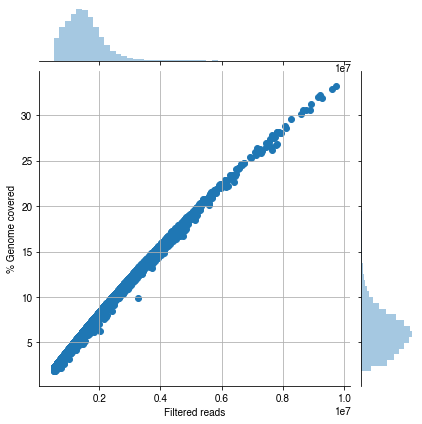

In [41]:
g = sns.jointplot(data=read_vs_cov, x='Filtered reads', y='% Genome covered')
g.ax_joint.grid()

In [52]:
# 250000 == 1% approximately
4000000.0/ 16

250000.0

In [53]:
read_vs_cov['% Genome covered'].describe()

count    58153.000000
mean         6.233425
std          2.577837
min          1.810000
25%          4.460000
50%          5.980000
75%          7.530000
max         33.230000
Name: % Genome covered, dtype: float64

In [55]:
cell_meta['MajorType'].value_counts().describe()

count       41.000000
mean      2536.146341
std       2749.507561
min         95.000000
25%        495.000000
50%       1819.000000
75%       3139.000000
max      11919.000000
Name: MajorType, dtype: float64

In [60]:
cell_meta[cell_meta['SubType'].apply(lambda i: 'Outlier' not in i)]['MajorType'].value_counts()['IG-CA2']

745

In [13]:
cell_meta[cell_meta['SubType'] == 'IG-CA2 Xpr1']['MajorRegion'].value_counts(
)

Isocortex    72
CNU          71
HPF           9
Name: MajorRegion, dtype: int64

In [12]:
cell_meta[cell_meta['SubType'] == 'IG-CA2 Xpr1']['MajorRegion'].value_counts(
) / cell_meta[cell_meta['SubType'] == 'IG-CA2 Xpr1'].shape[0]

Isocortex    0.473684
CNU          0.467105
HPF          0.059211
Name: MajorRegion, dtype: float64

In [6]:
cell_meta['SubType'].value_counts()['IG-CA2 Xpr1']

152

In [15]:
cell_meta[cell_meta['CellClass'] == 'Inh']['MajorType'].value_counts()

PAL-Inh      4481
MSN-D2       3340
MSN-D1       3139
MGE-Sst      2931
MGE-Pvalb    2636
LSX-Inh      2143
Foxp2        1964
D1L-Fstl4    1962
CGE-Vip      1746
OLF          1452
CGE-Lamp5    1449
D1L-PAL       495
Chd7          386
Unc5c         219
Name: MajorType, dtype: int64

In [21]:
cell_meta['MajorType'].value_counts()

IT-L23       11919
OLF-Exc       9681
CT-L6         8716
IT-L5         6640
DG            6179
IT-L6         4947
PAL-Inh       4481
IT-L4         4347
CA1           4075
MSN-D2        3340
MSN-D1        3139
ODC           3082
MGE-Sst       2931
PT-L5         2638
MGE-Pvalb     2636
CA3           2423
ASC           2215
LSX-Inh       2143
Foxp2         1964
D1L-Fstl4     1962
NP-L6         1819
CGE-Vip       1746
OLF           1452
CGE-Lamp5     1449
L6b           1069
CLA            945
MGC            853
OPC            777
IG-CA2         745
EP             666
D1L-PAL        495
VLMC           419
CA3-St18       408
Chd7           386
ANP            331
VLMC-Pia       225
Unc5c          219
PC             170
DG-po          145
Gfra1          110
EC              95
Name: MajorType, dtype: int64